랜덤 포레스트 정확도: 1.0000

분류 리포트:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



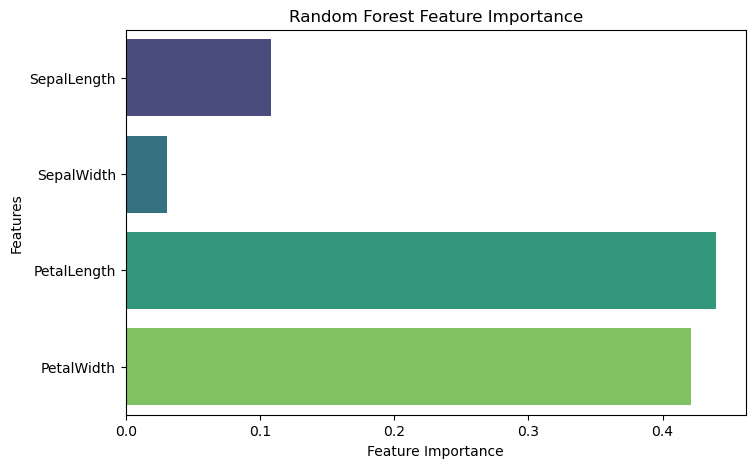

In [4]:
import pandas as pd  #데이터 시각화를 위한 Matplotlib 라이브러리
import matplotlib.pyplot as plt   #데이터를 더 보기 좋게 시각화
import seaborn as sns
from sklearn.model_selection import train_test_split    # 훈련용(train)과 테스트용(test)으로 나누는 함수
from sklearn.ensemble import RandomForestClassifier     #랜덤 포레스트(Random Forest) 분류 모델을 사용하기 위한 클래스
from sklearn.metrics import accuracy_score, classification_report  #모델의 **정확도(Accuracy)**를 측정하는 함수, 밀도(Precision), 재현율(Recall), F1-score 등의 성능 평가 지표를 출력

# 1. 데이터 불러오기
file_path = "C:\\Users\\LG\\Downloads\\iris.csv"  # 본인의 파일 경로 입력
df = pd.read_csv(file_path)

# 2. 데이터 전처리 (특성과 타겟 분리)
X = df.drop(columns=["Name"])  # 특성(Feature),품종(Name) 열을 제거->잎(sepal), 꽃받침(petal)의 길이와 너비 값이 x에 저장
y = df["Name"]  # 타겟(Label)변수가 y에 저장

# 3. 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #random_state=42:항상 같은 결과가 나오도록 난수를 고정

# 4. 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  #100개의 결정 트리(Decision Trees)로 이루어진 랜덤 포레스트를 생성
rf_model.fit(X_train, y_train)  #학습

# 5. 예측 및 평가
y_pred = rf_model.predict(X_test) #예측
accuracy = accuracy_score(y_test, y_pred)  #실제 품종과 예측된 품종 비교->정확도 계산
print(f"랜덤 포레스트 정확도: {accuracy:.4f}")
print("\n분류 리포트:\n", classification_report(y_test, y_pred))

# 6. 특성 중요도 시각화
feature_importances = rf_model.feature_importances_  #각 특성이 예측에 얼마나 중요한지를 계산->값이 높을수록 해당 특성이 품종을 에측하는 데에 중요함

plt.figure(figsize=(8, 5))  #그래프 크기
sns.barplot(x=feature_importances, y=X.columns, hue=X.columns, palette="viridis", dodge=False, legend=False)  #막대 그래프 형태, x축은 특성 중요도 값, y축은 특성, 색상 설정, 막대가 겹치지 않게 표시, 범례를 표시하지 않음 
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()